In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from collections import deque
from scipy.stats import norm
from scipy.stats import binom, poisson, expon, geom
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway as anova_1way

from scipy.stats import kruskal # numeric Vs catogerical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import skew, shapiro #[Test for normality]
import re

# Business Case - Zee - Recommender System

**Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.**

### Data Dictionary:

**RATINGS FILE DESCRIPTION**

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

 - UserIDs range between 1 and 6040

 - MovieIDs range between 1 and 3952

 - Ratings are made on a 5-star scale (whole-star ratings only)

 - Timestamp is represented in seconds

 - Each user has at least 20 ratings

**USERS FILE DESCRIPTION**

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified, 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student", 5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer"

**MOVIES FILE DESCRIPTION**

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
 "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

**Concepts Tested:**<br>
- Recommender Engine<br>
- Collaborative Filtering (Item-based & User-based Approach)<br>
- Pearson Correlation<br>
- Nearest Neighbors using Cosine Similarity<br>
- Matrix Factorization<br>

**What does “good” look like?**
- Reading the data files, formatting them into a proper workable format and merging the data files into one single dataframe
- Eg: pd.read_fwf('../input/zeemovie/movies.dat', encoding='ISO-8859-1')
- Performing exploratory data analysis like checking the structure & characteristics of the dataset and cleaning the data
- Performing feature engineering steps type conversions and deriving new features like ‘Release Year’
- Visualizing the data with respect to different categories to get a better understanding of the underlying distribution
- Grouping the data in terms of Average Rating and No. of Ratings given
- Creating a pivot table of movie titles & user id and imputing the NaN values with a suitable value
- Follow the Item-based approach and
    - Pearson Correlation
        - Take a movie name as input from the user
        - Recommend 5 similar movies based on Pearson Correlation
    - Cosine Similarity
        - Print the item similarity matrix and user similarity matrix
        - Example: An user-user similarity matrix just for demonstration.
    - Create a CSR matrix using the pivot table.[Optional, This is an extended approach, link to example implementation].
    - Write a function to return top 5 recommendations for a given item
    - [sklearn optional] Take a movie name as user input and use KNN algorithm to recommend 5 similar movies based on Cosine Similarity. [link to sklearn Nearest Neighbor documentation]

- Matrix Factorization
    - Use cmfrec/Surprise library to run matrix factorization. (Show results with d=4).
    - Evaluate the model’s performance using RMSE and MAPE.
    - Bonus - how can you do a train test split for MF?

- Embeddings for item-item and user-user similarity
    - Re-design the item-item similarity function to use MF embeddings (d=4) instead of raw features
    - Similarly, do this for user-user similarity
    - Bonus: Get d=2 embeddings, and plot the results. Write down your analysis from this visualisation. (Compare with other visualization techniques)
- Follow the User-based approach (Optional)
    - Ask the user to rate a few movies and create a dataframe of the user’s choices.
    - Find other users who’ve watched the same movies as the new user.
    - Sort the old users by the count of most movies in common with the new user.
    - Take the top 100 users and calculate a Similarity Score for each user using the Pearson Correlation function.
    - Get the top 10 users with the highest similarity indices, all the movies for these users, and add Weighted movie Ratings by Multiplying the Rating to the Similarity Index.
    - Calculate the average recommendation score by dividing the Weighted Rating by the Similarity Index and select movies with the highest score i.e., 5.
    - Now, recommend 10 movies based on the ratings given by old users who are similar to the new user.

**Evaluation Criteria (100 points)**

- Define Problem Statement and Formatting the Data (20 points)

    - Definition of the problem (as per the given problem statement with additional views)

    - Formatting the data files to bring them into a workable format

    - Merging the data files and creating a single consolidated dataframe

- Performing EDA, Data Cleaning, and Feature Engineering (20 Points)

    - Reviewing the shape and structure of the dataset

    - Performing necessary type conversion and deriving new features

    - Investigating the data for any inconsistency

    - Group the data according to the average rating and no. of ratings

- Build a Recommender System based on Pearson Correlation (10 Points)

    - Creating a pivot table of movie titles & user id and imputing the NaN values

    - Use the <mark>Item-based approach</mark> to create a simple recommender system that uses Pearson Correlation

- Build a Recommender System based on Cosine Similarity. (20 Points)

    - Print the user similarity matrix and item similarity matrix

    - Use the <mark>Item-based approach</mark> to create a recommender system that uses Nearest Neighbors algorithm and Cosine Similarity

- Build a Recommender System based on Matrix Factorization. (30 Points)

    - Create a Recommender System using the Matrix Factorization method

    - Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error

    - Use embeddings for visualization and similarity-based models.

- Build a Recommender System based Pearson Correlation. (Optional)

    - Use the <mark>User-based approach</mark> to create a recommender system that uses Pearson Correlation

**Questionnaire:**

- Users of which age group have watched and rated the most number of movies?

- Users belonging to which profession have watched and rated the most movies?

- Most of the users in our dataset who’ve rated the movies are Male. (T/F)

- Most of the movies present in our dataset were released in which decade?

    - 70s b. 90s c. 50s d.80s

- The movie with maximum no. of ratings is ___.

- Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

- On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

- Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

- Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

- Give the sparse ‘row’ matrix representation for the following dense matrix -

    - [[1 0]
    - [3 7]]

# Business Case - Zee - Recommender System

**INDEX**
- **(A) Problem Statements**
- **(B) shape, null values and duplicates**
- **(C) Exploratory data analysis(univariate/bivariate)**
- **(D) Recommender System based on Pearson Correlation**
- **(E) Recommender System based on Cosine Similarity**
- **(F) Build a Recommender System based on Regression**
- **(G) Build a Recommender System based on Matrix Factorization**
- **(H) Questionnaire**

# (A) Problem Statements

**Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.**

# (B) shape, null values and duplicates

### <mark>Data Preprocessing</mark>

#### preprocessing movies genres

In [110]:
movies = pd.read_fwf(r"/content/zee-movies.dat", encoding='ISO-8859-1')

In [111]:
movies.shape

(3883, 3)

In [112]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [113]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
 1   Unnamed: 1               100 non-null    object
 2   Unnamed: 2               51 non-null     object
dtypes: object(3)
memory usage: 91.1+ KB


In [114]:
movies.columns

Index(['Movie ID::Title::Genres', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

In [115]:
movies.columns = ["details","col1","col2"]

In [116]:
movies.head()

,details,col1,col2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [117]:
movies["details"][0]

"1::Toy Story (1995)::Animation|Children's|Comedy"

In [118]:
movies=movies["details"].str.lower().str.split("::",expand=True)

In [119]:
movies.head()

,0,1,2
0,1,toy story (1995),animation|children's|comedy
1,2,jumanji (1995),adventure|children's|fantasy
2,3,grumpier old men (1995),comedy|romance
3,4,waiting to exhale (1995),comedy|drama
4,5,father of the bride part ii (1995),comedy


In [120]:
movies.columns

RangeIndex(start=0, stop=3, step=1)

In [121]:
movies.columns=["MovieID","title","genres"]

In [122]:
movies["genres"].value_counts()

drama                                            830
comedy                                           518
horror                                           172
comedy|drama                                     159
comedy|romance                                   136
                                                ... 
action|adventure|children's                        1
action|adventure|children's|fantasy                1
action|adventure|sci-fi|th                         1
adventure|animation|children's|comedy|musical      1
drama|fantas                                       1
Name: genres, Length: 360, dtype: int64

In [123]:
movies.head()

,MovieID,title,genres
0,1,toy story (1995),animation|children's|comedy
1,2,jumanji (1995),adventure|children's|fantasy
2,3,grumpier old men (1995),comedy|romance
3,4,waiting to exhale (1995),comedy|drama
4,5,father of the bride part ii (1995),comedy


In [124]:
movies["genres"]=movies["genres"].str.split("|")

In [126]:
movies["MovieID"]=movies["MovieID"].astype("int64")

In [296]:
movies.head()

,MovieID,title,genres
0,1,toy story (1995),"[animation, children's, comedy]"
1,2,jumanji (1995),"[adventure, children's, fantasy]"
2,3,grumpier old men (1995),"[comedy, romance]"
3,4,waiting to exhale (1995),"[comedy, drama]"
4,5,father of the bride part ii (1995),[comedy]


In [127]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3858 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [128]:
m=movies.explode("genres")

In [129]:
m.head()

,MovieID,title,genres
0,1,toy story (1995),animation
0,1,toy story (1995),children's
0,1,toy story (1995),comedy
1,2,jumanji (1995),adventure
1,2,jumanji (1995),children's


In [130]:
m["genres"].value_counts()[:18].index

Index(['drama', 'comedy', 'action', 'thriller', 'romance', 'horror',
       'adventure', 'sci-fi', 'children's', 'crime', 'war', 'documentary',
       'musical', 'mystery', 'animation', 'western', 'fantasy', 'film-noir'],
      dtype='object')

In [131]:
m["genres"].unique()

array(['animation', "children's", 'comedy', 'adventure', 'fantasy',
       'romance', 'drama', 'action', 'crime', 'thriller', 'horror',
       'sci-fi', 'documentary', 'war', 'musical', 'mystery', None,
       'film-noir', 'dram', 'western', 'chil', '', 'fantas', 'dr', 'd',
       'documenta', 'wester', 'fant', 'music', 'childre', 'childr', 'rom',
       'animati', 'children', 'come', "children'", 'sci-f', 'adv',
       'adventu', 'horro', 'docu', 's', 'sci-', 'document', 'th', 'roman',
       'documen', 'we', 'f', 'ro', 'r', 'sci', 'chi', 'thri', 'adventur',
       'advent', 'acti', 'roma', 'a', 'comed', 'com', 'thrille', 'wa',
       'horr'], dtype=object)

In [132]:
word_dct = {"dram":"drama","chil":"children","fantas":"fantasy","dr":"drama","d":"drama","documenta":"documentary",
            "wester":"western","fant":"fantasy","childre":"children","childr":"children","rom":"romance","animati":"animation",
            "children's":"children","children'":"children","sci-f":"sci-fi","adv":"adventure","adventu":"adventure",
            "horro":"horror","docu":"documentary","s":"sci-fi","sci-":"sci-fi","document":"documentary","th":"thriller",
            "roman":"romance","documen":"documentary","we":"western","f":"fantasy","ro":"romance","r":"romance","sci":"sci-fi",
            "chi":"children","thri":"thriller","adventur":"adventure","advent":"adventure","acti":"action",
            "roma":"romance","a":"action","comed":"comedy","com":"comedy","thrille":"thriller","wa":"war","horr":"horror",
           'drama':"drama", 'comedy':"comedy", 'action':"action", 'thriller':"thriller", 'romance':"romance", 'horror':"horror",
       'adventure':"adventure", 'sci-fi':"sci-fi","children":"children",'crime':"crime", 'war':"war", 'documentary':"documentary",
       'musical':"musical", 'mystery':"mystery", 'animation':"animation", 'western':"western", 'fantasy':"fantasy",
            'film-noir':"film-noir"}

In [133]:
m["genres"]=m["genres"].map(word_dct)

In [134]:
m["genres"].value_counts()

drama          1585
comedy         1186
action          503
thriller        488
romance         462
horror          340
adventure       282
sci-fi          265
children        249
crime           210
war             139
documentary     124
musical         112
mystery         105
animation       104
western          68
fantasy          63
film-noir        44
Name: genres, dtype: int64

In [135]:
m.isna().sum()/m.shape[0]

MovieID    0.000000
title      0.000000
genres     0.005812
dtype: float64

In [136]:
m.dropna(inplace=True)

In [137]:
m.isna().sum()/m.shape[0]

MovieID    0.0
title      0.0
genres     0.0
dtype: float64

In [138]:
m.head()

,MovieID,title,genres
0,1,toy story (1995),animation
0,1,toy story (1995),children
0,1,toy story (1995),comedy
1,2,jumanji (1995),adventure
1,2,jumanji (1995),children


In [139]:
m["MovieID"]=m["MovieID"].astype("int64")

In [140]:
m.duplicated().sum()

1

In [141]:
m.drop_duplicates(inplace=True)

In [142]:
m.duplicated().sum()

0

In [143]:
m.head()

,MovieID,title,genres
0,1,toy story (1995),animation
0,1,toy story (1995),children
0,1,toy story (1995),comedy
1,2,jumanji (1995),adventure
1,2,jumanji (1995),children


In [144]:
pd.get_dummies(m, columns=["genres"], drop_first=False).drop(columns=["title"]).groupby(["MovieID"]).sum().head()

,genres_action,genres_adventure,genres_animation,genres_children,genres_comedy,genres_crime,genres_documentary,genres_drama,genres_fantasy,genres_film-noir,genres_horror,genres_musical,genres_mystery,genres_romance,genres_sci-fi,genres_thriller,genres_war,genres_western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
m=m.pivot(index='MovieID', columns='genres', values='title').notna().astype("int64")

In [146]:
m.head()

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### preprocessing ratings data

In [147]:
ratings = pd.read_fwf(r"/content/zee-ratings.dat", encoding='ISO-8859-1')

In [148]:
ratings.shape

(260830, 1)

In [149]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [150]:
ratings.columns

Index(['UserID::MovieID::Rating::Timestamp'], dtype='object')

In [151]:
ratings.columns=["details"]

In [152]:
ratings_expand=ratings["details"].str.split("::", expand=True)

In [153]:
ratings_expand.columns=["UserID","MovieID","Rating","Timestamp"]

In [154]:
ratings_expand.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [155]:
ratings = ratings_expand.copy()

In [156]:
ratings.isnull().sum()

UserID       0
MovieID      1
Rating       1
Timestamp    1
dtype: int64

In [157]:
ratings=ratings.dropna()

In [158]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [159]:
ratings["Timestamp"].astype("int64").astype("datetime64[s]").dt.month_name().value_counts()

November     124343
December     101388
January       11468
February       5067
March          3365
April          3089
June           2818
August         2418
May            2372
July           2145
September      1283
October        1073
Name: Timestamp, dtype: int64

In [160]:
ratings["Timestamp"].astype("int64").astype("datetime64[s]").dt.year.value_counts()

2000    222168
2001     29226
2002      8530
2003       905
Name: Timestamp, dtype: int64

In [161]:
ratings["Timestamp"].astype("int64").astype("datetime64[s]")

0        2000-12-31 22:12:40
1        2000-12-31 22:35:09
2        2000-12-31 22:32:48
3        2000-12-31 22:04:35
4        2001-01-06 23:38:11
                 ...        
260824   2000-11-26 04:13:24
260825   2000-11-26 04:16:39
260826   2000-11-26 04:16:39
260827   2000-11-26 04:22:51
260828   2000-11-26 04:20:22
Name: Timestamp, Length: 260829, dtype: datetime64[ns]

In [162]:
ratings["Timestamp"]=ratings["Timestamp"].astype("int64").astype("datetime64[s]")

In [163]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


#### preprocessing users data

In [164]:
users = pd.read_fwf(r"/content/zee-users.dat", encoding='ISO-8859-1')

In [165]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [166]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   UserID::Gender::Age::Occupation::Zip-code  6040 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB


In [167]:
users.shape

(6040, 1)

In [168]:
users.columns

Index(['UserID::Gender::Age::Occupation::Zip-code'], dtype='object')

In [169]:
users.columns=["details"]

In [170]:
users["details"].isnull().sum()

0

In [171]:
users=users["details"].str.split("::",expand=True)

In [172]:
users.columns

RangeIndex(start=0, stop=5, step=1)

In [173]:
users.columns=["UserID","Gender","Age","Occupation","Zip-code"]

In [174]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### <mark>checking null values and duplicates</mark>

### movies

In [175]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3858 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [176]:
movies.isnull().sum()

MovieID     0
title       0
genres     25
dtype: int64

In [177]:
movies["MovieID"].duplicated().sum()

0

### ratings

In [178]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [179]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260829 entries, 0 to 260828
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   UserID     260829 non-null  object        
 1   MovieID    260829 non-null  object        
 2   Rating     260829 non-null  object        
 3   Timestamp  260829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 9.9+ MB


In [180]:
ratings=ratings.astype({"UserID":"int64","MovieID":"int64","Rating":"int64"})

In [181]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260829 entries, 0 to 260828
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   UserID     260829 non-null  int64         
 1   MovieID    260829 non-null  int64         
 2   Rating     260829 non-null  int64         
 3   Timestamp  260829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 9.9 MB


In [182]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [183]:
ratings.duplicated().sum()

0

### users

In [184]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [185]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [186]:
users=users.astype({"UserID":"int64","Age":"int64","Occupation":"int64"})

In [187]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [188]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [189]:
users.duplicated().sum()

0

# (C) Exploratory data analysis(univariate/bivariate)

## `EDA: movies`

<Axes: ylabel='genres'>

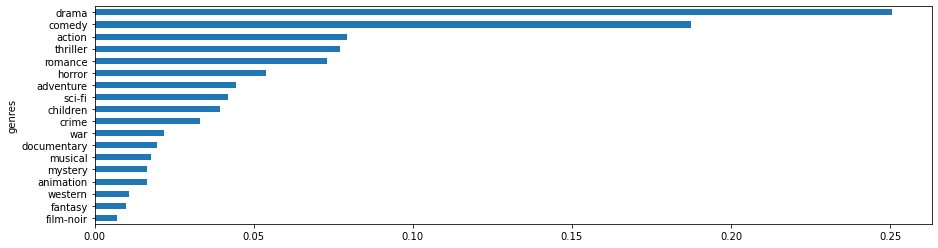

In [190]:
(m.sum(axis=0).sort_values(ascending=True)/m.sum(axis=0).sum()).plot(kind="barh", figsize=(15,4))

<mark>***Top 3 genres of movies creation are Drama(25%), Comedy(18%) and action(8%)***</mark>

<Axes: ylabel='0'>

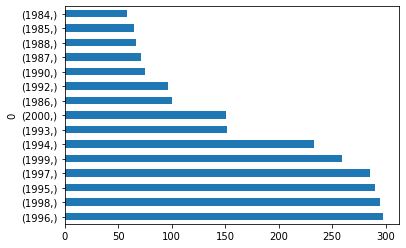

In [306]:
movies["title"].str.extract(r"(\d{4})").value_counts(ascending=False)[:15].plot(kind="barh")

<mark>**highest no. of movies were released in year 1996**</mark>

## `EDA: ratings`

In [191]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [317]:
ratings.groupby(["MovieID"]).aggregate({"UserID":"count"}).rename(columns={"UserID":"viewers"}).sort_values(by=["viewers"], ascending=False)[:5].merge(movies, on="MovieID", how="inner")

,MovieID,viewers,title,genres
0,2858,967,american beauty (1999),"[comedy, drama]"
1,1196,784,star wars: episode v - the empire strikes back...,"[action, adv]"
2,480,779,jurassic park (1993),"[action, adventure, sci-fi]"
3,260,772,star wars: episode iv - a new hope (1977),"[action, adventure, fantas]"
4,1210,762,star wars: episode vi - return of the jedi (1983),"[action, adventu]"


<mark>**Most watched movie is "american beauty (1999)"**</mark>

In [320]:
ratings.groupby(["MovieID"]).aggregate({"Rating":"mean","UserID":"count"}).rename(columns={"UserID":"viewers"}).sort_values(by=["Rating","viewers"], ascending=[False,False])[:10].merge(movies, on="MovieID", how="inner")

,MovieID,Rating,viewers,title,genres
0,854,5.0,2,"ballad of narayama, the (narayama bushiko) (1958)",[drama]
1,3570,5.0,2,"last september, the (1999)",[drama]
2,578,5.0,1,"hour of the pig, the (1993)","[drama, mystery]"
3,787,5.0,1,"gate of heavenly peace, the (1995)",[documentary]
4,853,5.0,1,dingo (1992),[drama]
5,1000,5.0,1,curdled (1996),[crime]
6,2557,5.0,1,i stand alone (seul contre tous) (1998),[drama]
7,2931,5.0,1,time of the gypsies (dom za vesanje) (1989),[drama]
8,2984,5.0,1,on any sunday (1971),[documentary]
9,3003,5.0,1,train of life (train de vie) (1998),"[comedy, drama]"


In [192]:
ratings.shape

(260829, 4)

In [193]:
tdf=ratings.groupby(["MovieID"])[["Rating"]].aggregate("mean").reset_index().merge(m, left_on="MovieID", right_on="MovieID", how="inner")

In [194]:
tdf.head()

,MovieID,Rating,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,4.138889,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.134409,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,3.040268,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,2.739130,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,2.884615,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
tdf.shape

(3520, 20)

In [196]:
tdf["Rating"][tdf["adventure"]==1].mean()

3.0772558464703796

In [197]:
rating_dct={}
for genres in tdf.columns[2:]:
    r = tdf["Rating"][tdf[genres]==1].mean()
    rating_dct[genres]=r

<Axes: >

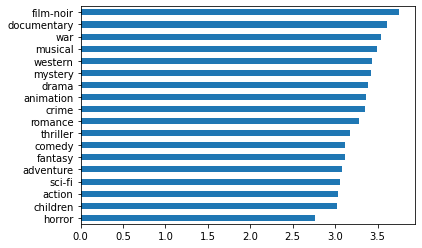

In [198]:
pd.Series(rating_dct.values(), index=rating_dct.keys()).sort_values().plot(kind="barh")

<mark>***Top rated genres are film-noir, documentary and western***</mark>

In [199]:
ratings.loc[:,["UserID","MovieID"]].merge(m, left_on="MovieID", right_on="MovieID", how="inner").iloc[:,2:]

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259817,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
259818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259819,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259820,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<Axes: >

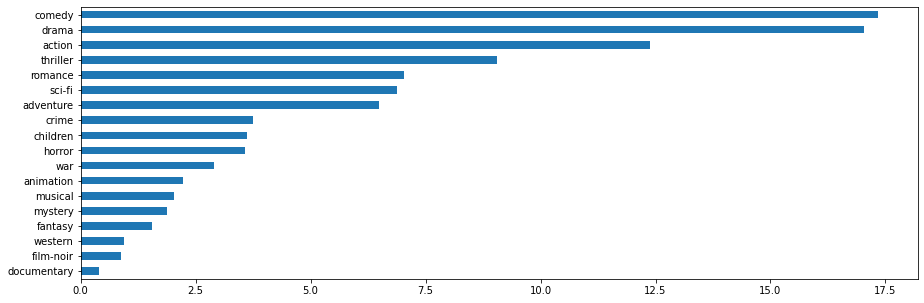

In [200]:
tmp = ratings.loc[:,["UserID","MovieID"]].merge(m, left_on="MovieID", right_on="MovieID", how="inner").iloc[:,2:]
tmp = tmp.sum(axis=0)
tmp = 100*tmp/tmp.sum()
tmp.sort_values().plot(kind="barh", figsize=(15,5))

<mark>***Top 5 most watched genres are comedy(17%), drama(17%), action(12%), thriller(9%), romance(7%)***</mark>

## `EDA: users`

<Axes: >

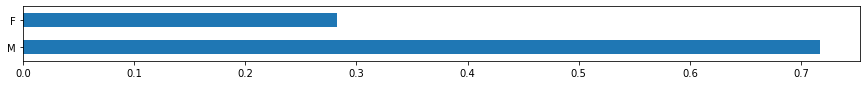

In [201]:
users["Gender"].value_counts(normalize=True).plot(kind="barh", figsize=(15,1))

<mark>***approx 70% male users and 30% female users***</mark>

In [202]:
# Age is chosen from the following ranges:
age_catg = {1: "Under 18",18:"18-24",25:"25-34",35: "35-44",45: "45-49",50: "50-55",56: "56+"}

<Axes: >

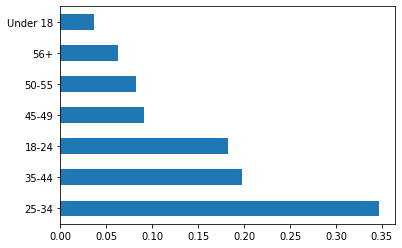

In [203]:
users["Age"].map(age_catg).value_counts(normalize=True).plot(kind="barh")

<mark>***most users are in the age group of 25-34 i.e, approx 35% of total users***</mark>

<Axes: xlabel='Age', ylabel='count'>

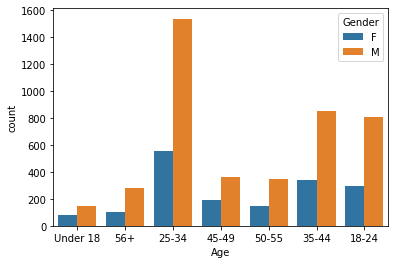

In [204]:
tmp = users.copy()
tmp["Age"]=tmp["Age"].map(age_catg)
sns.countplot(data=tmp, x="Age", hue="Gender")

In [205]:
# Occupation is chosen from the following choices:
occupation_catg = {0: "other", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                   4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                   7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                   12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                   17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer"}

<Axes: >

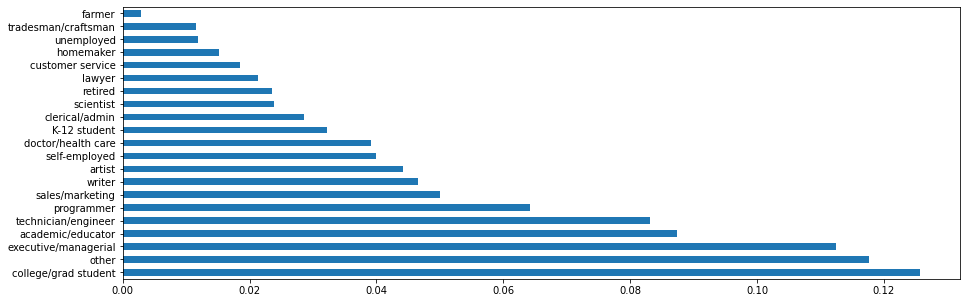

In [206]:
users["Occupation"].map(occupation_catg).value_counts(normalize=True).plot(kind="barh", figsize=(15,5))

<mark>***most users are college/grad_students approx 12% of total users***</mark>

<Axes: xlabel='count', ylabel='Occupation'>

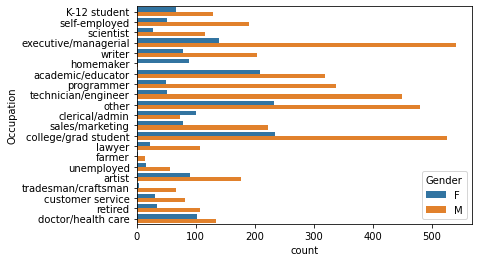

In [207]:
tmp = users.copy()
tmp["Occupation"]=tmp["Occupation"].map(occupation_catg)
sns.countplot(data=tmp, y="Occupation", hue="Gender")

### EDA Summary:

<mark>***Top 3 genres of movies creation are Drama(25%), Comedy(18%) and action(8%)***</mark>

<mark>**highest no. of movies were released in year 1996**</mark>

<mark>**Most watched movie is "american beauty (1999)"**</mark>

<mark>***Top rated genres are film-noir, documentary and western***</mark>

<mark>***Top 5 most watched genres are comedy(17%), drama(17%), action(12%), thriller(9%), romance(7%)***</mark>

<mark>***approx 70% male users and 30% female users***</mark>

<mark>***most users are in the age group of 25-34 i.e, approx 35% of total users***</mark>

<mark>***most users are college/grad_students approx 12% of total users***</mark>

---

# (D) **Recommender System based on Pearson Correlation**

- ## **Build a Recommender System based on Pearson Correlation**

    - `Creating a pivot table of movie titles & user id and imputing the NaN values`

    - <mark>Use the Item-based approach to create a simple recommender system that uses Pearson Correlation</mark>

In [208]:
movies.head()

,MovieID,title,genres
0,1,toy story (1995),"[animation, children's, comedy]"
1,2,jumanji (1995),"[adventure, children's, fantasy]"
2,3,grumpier old men (1995),"[comedy, romance]"
3,4,waiting to exhale (1995),"[comedy, drama]"
4,5,father of the bride part ii (1995),[comedy]


In [209]:
movies.shape

(3883, 3)

In [210]:
movies_ = ratings.merge(movies, on="MovieID", how="left").loc[:,["UserID","Rating","title"]].pivot(index="UserID", columns="title", values="Rating").fillna(0)

In [211]:
movies_.head()

title,"$1,000,000 duck (1971)","'burbs, the (1989)",'night mother (1986),'til there was you (1997),...and justice for all (1979),10 things i hate about you (1999),101 dalmatians (1961),101 dalmatians (1996),12 angry men (1957),"13th warrior, the (1999)",...,young frankenstein (1974),young guns (1988),young guns ii (1990),"young poisoner's handbook, the (1995)",young sherlock holmes (1985),your friends and neighbors (1998),"zed & two noughts, a (1985)",zero effect (1998),zero kelvin (kjærlighetens kjøtere) (1995),zeus and roxanne (1997)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


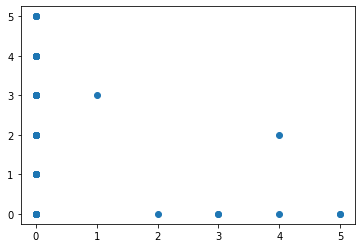

In [212]:
plt.scatter(x=movies_.iloc[:,0], y=movies_.iloc[:,1]) #scatter plot between movie id 1&2

In [213]:
movies_corr = movies_.corr()

In [214]:
movies_corr[:5]

title,"$1,000,000 duck (1971)","'burbs, the (1989)",'night mother (1986),'til there was you (1997),...and justice for all (1979),10 things i hate about you (1999),101 dalmatians (1961),101 dalmatians (1996),12 angry men (1957),"13th warrior, the (1999)",...,young frankenstein (1974),young guns (1988),young guns ii (1990),"young poisoner's handbook, the (1995)",young sherlock holmes (1985),your friends and neighbors (1998),"zed & two noughts, a (1985)",zero effect (1998),zero kelvin (kjærlighetens kjøtere) (1995),zeus and roxanne (1997)
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 duck (1971)",1.000000,0.026067,-0.005532,-0.007007,-0.010676,0.087005,0.143407,0.177947,0.064786,0.015128,...,0.021092,0.006387,0.064604,-0.007179,-0.006233,-0.009313,-0.003944,0.008747,-0.001657,0.056584
"'burbs, the (1989)",0.026067,1.000000,0.092205,0.074958,0.126359,0.119388,0.185131,0.081885,0.180670,0.167369,...,0.178166,0.252099,0.186817,0.025439,0.076012,0.128551,0.042795,0.106069,-0.005306,0.057680
'night mother (1986),-0.005532,0.092205,1.000000,0.116541,0.088496,-0.004130,0.086255,0.028339,0.008953,-0.005782,...,0.106634,0.028268,0.033408,0.144754,0.067579,0.057921,0.064335,0.014613,-0.002095,-0.004282
'til there was you (1997),-0.007007,0.074958,0.116541,1.000000,0.039717,0.104472,0.094750,0.137969,0.089647,0.021373,...,0.017436,0.053162,0.046039,0.083715,0.032833,0.017778,-0.006317,0.047084,-0.002654,-0.005423
...and justice for all (1979),-0.010676,0.126359,0.088496,0.039717,1.000000,0.035833,0.182182,0.134760,0.176444,0.071672,...,0.124391,0.092771,0.078449,0.094288,0.086424,0.144028,0.051447,0.115624,-0.004044,-0.008263


In [215]:
movies_corr.iloc[:,:1].sort_values(by=[movies_corr.iloc[:,:1].columns[0]], ascending=False)[:5]

title,"$1,000,000 duck (1971)"
title,
"$1,000,000 duck (1971)",1.000000
air bud (1997),0.396085
"last time i saw paris, the (1954)",0.389679
"little indian, big city (un indien dans la ville) (1994)",0.389679
"apple dumpling gang rides again, the (1979)",0.355074


In [216]:
movies_corr.columns

Index(['$1,000,000 duck (1971)', ''burbs, the (1989)', ''night mother (1986)',
       ''til there was you (1997)', '...and justice for all (1979)',
       '10 things i hate about you (1999)', '101 dalmatians (1961)',
       '101 dalmatians (1996)', '12 angry men (1957)',
       '13th warrior, the (1999)',
       ...
       'young frankenstein (1974)', 'young guns (1988)',
       'young guns ii (1990)', 'young poisoner's handbook, the (1995)',
       'young sherlock holmes (1985)', 'your friends and neighbors (1998)',
       'zed & two noughts, a (1985)', 'zero effect (1998)',
       'zero kelvin (kjærlighetens kjøtere) (1995)',
       'zeus and roxanne (1997)'],
      dtype='object', name='title', length=3544)

#### Movies Recommendation <mark>based on Pearson Correlation</mark> <strong>`(top 10 similar movies to a given query movie)`</strong>
- **Recommend Top 10 similar movies to "young guns (1988)"**

**<mark>now, we can recommend topN movies similar to a given movie</mark>**

In [217]:
query = "young guns (1988)"
TopN = 10
movies_corr[query].sort_values(ascending=False)[1:TopN+1].index

Index(['young guns ii (1990)', 'lethal weapon 2 (1989)',
       'conan the barbarian (1982)', 'golden child, the (1986)',
       'big trouble in little china (1986)', 'lethal weapon (1987)',
       'running man, the (1987)', 'highlander (1986)',
       'indiana jones and the temple of doom (1984)', 'three amigos! (1986)'],
      dtype='object', name='title')

---

# (E) **Recommender System based on Cosine Similarity**

- ## **Build a Recommender System based on <mark>Cosine Similarity.</mark>**

    - `Print the user similarity matrix and item similarity matrix`

    - <mark>Use the Item-based approach to create a recommender system that uses Nearest Neighbors algorithm and Cosine Similarity</mark>

### **`Nearest Neighbour algorithm`** - **<mark>Content Based RecSys:</mark> similarities(cosine distance)**

In [218]:
m.head()

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [219]:
m.loc[1].values/np.linalg.norm(m.loc[1].values)

array([0.        , 0.        , 0.57735027, 0.57735027, 0.57735027,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [220]:
def cos_dist(a_hat,b_hat):
  ans = np.dot(a_hat,b_hat)
  return ans

In [221]:
m_hat = m/np.linalg.norm(m, axis=1).reshape(-1,1)
m_hat.head()

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,
1,0.0,0.00000,0.57735,0.57735,0.577350,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.57735,0.00000,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.00000,0.00000,0.707107,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.00000,0.00000,0.707107,0.0,0.0,0.707107,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.00000,0.00000,0.00000,1.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [222]:
cos_dist(m_hat.iloc[0], m_hat.iloc[1])

0.3333333333333334

In [223]:
cosine_distance = []
for query in m_hat.index[:500]:
    for candidate in m_hat.index:
        if candidate == query:
            continue
        cosine_distance.append([query, candidate, cos_dist(m_hat.loc[query],m_hat.loc[candidate])])

In [224]:
RecSys_cosine = pd.DataFrame(cosine_distance, columns=["query","candidate","dist"]).merge(movies.iloc[:,:-1], left_on="query", right_on="MovieID", how="left")

In [225]:
RecSys_cosine = RecSys_cosine.drop(columns=["MovieID"]).rename(columns={"title":"query_title"})

In [226]:
RecSys_cosine = RecSys_cosine.merge(movies.iloc[:,:-1], left_on="candidate", right_on="MovieID", how="left")

In [227]:
RecSys_cosine = RecSys_cosine.drop(columns=["MovieID"]).rename(columns={"title":"candidate_title"})

In [228]:
RecSys_cosine = RecSys_cosine.sort_values(by=["query","dist"], ascending=[True,False])

In [229]:
RecSys_cosine.head()

,query,candidate,dist,query_title,candidate_title
2058,1,2141,1.0,toy story (1995),"american tail, an (1986)"
2270,1,2354,1.0,toy story (1995),"rugrats movie, the (1998)"
2271,1,2355,1.0,toy story (1995),"bug's life, a (1998)"
3023,1,3114,1.0,toy story (1995),toy story 2 (1999)
3518,1,3611,1.0,toy story (1995),saludos amigos (1943)


#### Movies Recommendation <mark>based on Cosine_distance</mark> <strong>`(top 10 similar movies to a given query movie)`</strong>
- **Recommend Top 10 similar movies to "toy story (1995)"**

In [329]:
RecSys_cosine.loc[RecSys_cosine["query_title"]=="toy story (1995)"][:10]

,query,candidate,dist,query_title,candidate_title
2058,1,2141,1.000000,toy story (1995),"american tail, an (1986)"
2270,1,2354,1.000000,toy story (1995),"rugrats movie, the (1998)"
2271,1,2355,1.000000,toy story (1995),"bug's life, a (1998)"
3023,1,3114,1.000000,toy story (1995),toy story 2 (1999)
3518,1,3611,1.000000,toy story (1995),saludos amigos (1943)
3654,1,3751,1.000000,toy story (1995),chicken run (2000)
233,1,239,0.866025,toy story (1995),"goofy movie, a (1995)"
579,1,588,0.866025,toy story (1995),aladdin (1992)
1995,1,2078,0.866025,toy story (1995),"jungle book, the (1967)"
2019,1,2102,0.866025,toy story (1995),steamboat willie (1940)


### **`Nearest Neighbour algorithm`** - **Content Based RecSys: similarities<mark>(hamming distance)</mark>**

#### RecSys based on common genres - logic based system

In [231]:
m.head()

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### `hamming distance` is a special case of `manhatten distance` when all data point are 1's and 0's

In [232]:
def hamming_distance(a,b):
    return sum(abs(a-b))

In [233]:
ranks = []
for query in m.index:
    for candidate in m.index[:500]:
        if candidate == query:
            continue
        ranks.append([query, candidate, hamming_distance(m.loc[query],m.loc[candidate])])

In [234]:
RecSys = pd.DataFrame(ranks, columns=["query","candidate","dist"])

In [235]:
RecSys.shape

(1927000, 3)

In [236]:
RecSys = pd.DataFrame(ranks, columns=["query","candidate","dist"])
RecSys = RecSys.merge(movies.iloc[:,:-1], left_on="query", right_on="MovieID", how="inner").drop(columns=["MovieID"]).rename(columns={"title":"query_title"})

In [237]:
RecSys = RecSys.merge(movies.iloc[:,:-1], left_on="candidate", right_on="MovieID", how="inner").drop(columns=["MovieID"]).rename(columns={"title":"candidate_title"})

In [238]:
RecSys = RecSys.sort_values(by=["query","dist"])

In [239]:
RecSys.shape

(1927000, 5)

In [240]:
RecSys.head()

,query,candidate,dist,query_title,candidate_title
42394,1,13,1,toy story (1995),balto (1995)
200408,1,54,1,toy story (1995),"big green, the (1995)"
323736,1,87,1,toy story (1995),dunston checks in (1996)
897982,1,239,1,toy story (1995),"goofy movie, a (1995)"
917252,1,244,1,toy story (1995),gumby: the movie (1995)


In [325]:
movies[movies["title"].str.contains("liar")]

,MovieID,title,genres
1455,1485,liar liar (1997),[comedy]
2813,2882,jakob the liar (1999),[drama]


#### Movies Recommendation<strong>`(top 10 similar movies to a given query movie)`</strong>
- **Recommend Top 10 similar movies to "liar liar (1997)"**

In [330]:
RecSys.loc[RecSys["query_title"]=="liar liar (1997)"][:10]

,query,candidate,dist,query_title,candidate_title
13004,1485,5,0,liar liar (1997),father of the bride part ii (1995)
66960,1485,19,0,liar liar (1997),ace ventura: when nature calls (1995)
140186,1485,38,0,liar liar (1997),it takes two (1995)
194142,1485,52,0,liar liar (1997),mighty aphrodite (1995)
240390,1485,65,0,liar liar (1997),bio-dome (1996)
255806,1485,69,0,liar liar (1997),friday (1995)
329032,1485,88,0,liar liar (1997),black sheep (1996)
356010,1485,96,0,liar liar (1997),in the bleak midwinter (1995)
375280,1485,101,0,liar liar (1997),bottle rocket (1996)
379134,1485,102,0,liar liar (1997),mr. wrong (1996)


## Collaborative based RecSys: <mark>User Recommendation</mark> 
**`(find closest users similar to a given users)`**

In [242]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [243]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [244]:
r = ratings.groupby(["UserID"]).aggregate({"Rating":"mean"}).reset_index().rename(columns={"UserID":"uid"})
rec_sys = users.merge(r, left_on="UserID", right_on="uid", how="inner").drop(columns=["uid"])
rec_sys["age_catg"]=rec_sys["Age"].map(age_catg)
rec_sys.head()

,UserID,Gender,Age,Occupation,Zip-code,Rating,age_catg
0,1,F,1,10,48067,4.188679,Under 18
1,2,M,56,16,70072,3.713178,56+
2,3,M,25,15,55117,3.901961,25-34
3,4,M,45,7,02460,4.190476,45-49
4,5,M,25,20,55455,3.146465,25-34


In [245]:
def euclidean_dist(a, b):
    return np.linalg.norm(a-b)

In [246]:
u = rec_sys.loc[:,["UserID","Age","Occupation","Rating"]].set_index("UserID")
u.head()

,Age,Occupation,Rating
UserID,,,
1,1,10,4.188679
2,56,16,3.713178
3,25,15,3.901961
4,45,7,4.190476
5,25,20,3.146465


In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head()

,Age,Occupation,Rating
UserID,,,
1,-2.174116,0.286869,1.139709
2,1.939863,1.217541,0.022925
3,-0.378925,1.062429,0.466309
4,1.117067,-0.178466,1.143930
5,-0.378925,1.837988,-1.308085


#### users similar/close to userid=5

In [248]:
userid = 5

dist = []
for user in u.index:
    dist.append(euclidean_dist(u.loc[userid], u.loc[user]))

u_rank = pd.DataFrame()
u_rank["id"] = u.index
u_rank["dist"] = dist
u_rank = u_rank.loc[u_rank["id"] != userid]
u_rank = u_rank.sort_values(by=["dist"])
u_rank.head()

,id,dist
797,798,0.007944
672,673,0.035115
643,644,0.061286
1544,1545,0.105882
453,454,0.168117


In [249]:
rec_sys.loc[rec_sys["UserID"].isin([userid, 5595, 798, 673, 644])]

,UserID,Gender,Age,Occupation,Zip-code,Rating,age_catg
4,5,M,25,20,55455,3.146465,25-34
643,644,M,25,20,93704,3.120370,25-34
672,673,M,25,20,10023,3.131514,25-34
797,798,F,25,20,48464,3.149847,25-34


# (F) Build a Recommender System based on Regression
- <mark>Regression based RecSys</mark> **(predict rating for a given user & movie)**

In [250]:
select_movies = ratings["MovieID"].value_counts().index.to_list()

In [251]:
movies.loc[movies["MovieID"].isin(select_movies)]

,MovieID,title,genres
0,1,toy story (1995),"[animation, children's, comedy]"
1,2,jumanji (1995),"[adventure, children's, fantasy]"
2,3,grumpier old men (1995),"[comedy, romance]"
3,4,waiting to exhale (1995),"[comedy, drama]"
4,5,father of the bride part ii (1995),[comedy]
...,...,...,...
3878,3948,meet the parents (2000),[comedy]
3879,3949,requiem for a dream (2000),[drama]
3880,3950,tigerland (2000),[drama]
3881,3951,two family house (2000),[drama]


In [252]:
movies = movies.loc[movies["MovieID"].isin(select_movies)]

In [253]:
ratings = ratings.loc[ratings["MovieID"].isin(select_movies)]

In [254]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [255]:
m_temp = m[m.index.isin(select_movies)]

In [256]:
m_temp.head(2)

genres,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [257]:
users = users.merge(ratings.groupby(["UserID"])["Rating"].mean().reset_index(), on="UserID")

In [258]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code,Rating
0,1,F,1,10,48067,4.188679
1,2,M,56,16,70072,3.713178


In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [260]:
u = users.loc[:,["UserID","Age","Occupation","Rating"]]
u = u.set_index("UserID")
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.columns=["Age","Occupation","user_avg_rating"]
u.head(2)

,Age,Occupation,user_avg_rating
UserID,,,
1,-2.174116,0.286869,1.139709
2,1.939863,1.217541,0.022925


In [261]:
X = ratings.loc[:,["MovieID","UserID","Rating"]]
X = X.merge(u.reset_index(), on="UserID", how="right")
X = X.merge(m_temp, left_on="MovieID", right_on="MovieID", how="right")

In [262]:
X.columns

Index(['MovieID', 'UserID', 'Rating', 'Age', 'Occupation', 'user_avg_rating',
       'action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical',
       'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western'],
      dtype='object')

In [263]:
X.head(2)

,MovieID,UserID,Rating,Age,Occupation,user_avg_rating,action,adventure,animation,children,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,1,5,-2.174116,0.286869,1.139709,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,6,4,1.491065,0.131758,0.465012,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [264]:
X = X.drop(columns=["MovieID","UserID"])
y = X.pop("Rating")

In [265]:
X.head(2)

,Age,Occupation,user_avg_rating,action,adventure,animation,children,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,-2.174116,0.286869,1.139709,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.491065,0.131758,0.465012,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
y.head(2)

0    5
1    4
Name: Rating, dtype: int64

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [268]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [269]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error
mse(y_test, y_pred)**0.5

1.0182593449658046

In [270]:
mean_absolute_percentage_error(y_test, y_pred)

0.3341598670080304

# (G) Build a Recommender System based on Matrix Factorization
- **Build a Recommender System based on Matrix Factorization.**

    - `Create a Recommender System using the Matrix Factorization method`

    - <mark>Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error</mark>

    - `Use embeddings for visualization and similarity-based models`

## <mark>Matrix Factorization:</mark> collaborative filtering(cross recommendation)

In [271]:
!pip install cmfrec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 KB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.21-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post3-cp39-cp39-linux_x86_64.whl size=5779451 sha256=523edd4a0cbb8f598d31ab57416b9902c547ff6453adaabb2ea2f97dea042600
  Stored in directory: /root/.cache/pip/wheels/6a/e7/47/3ef29fa44b63126455f3ab07fdd04b4ad0051cda2c971bd9c1
Successfully built cmfrec


In [272]:
users.shape

(1594, 6)

In [273]:
movies.shape

(3544, 3)

In [274]:
ratings.shape

(260829, 4)

In [275]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [276]:
rm = ratings.pivot(index="UserID", columns="MovieID", values="Rating").fillna(0)
rm.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
rm.shape

(1594, 3544)

#### Matrix Factorization

In [278]:
ratings.head(2)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09


In [279]:
rm_raw = ratings.loc[:,["UserID","MovieID","Rating"]]

In [280]:
rm_raw.columns

Index(['UserID', 'MovieID', 'Rating'], dtype='object')

***this library requires specific columns name***

In [281]:
rm_raw.columns = ["UserId","ItemId","Rating"]

In [282]:
rm_raw.head()

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


# Fit and Predict

In [283]:
from cmfrec import CMF

In [284]:
model = CMF(method="als", k=2, user_bias=False, item_bias=False, verbose=False)

In [285]:
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [286]:
#prediction
model.topN(user=1, n=7)

array([ 260, 1198,  527, 2028, 3114, 1196, 2762])

array([ 260, 1198, 1196, 2028,  527, 3578, 1617]) these <mark>movies id's</mark> are <mark>top recommendations for user 1</mark>

In [287]:
movies.loc[movies["MovieID"].isin(model.topN(user=1, n=7))]

,MovieID,title,genres
257,260,star wars: episode iv - a new hope (1977),"[action, adventure, fantas]"
523,527,schindler's list (1993),"[drama, war]"
1178,1196,star wars: episode v - the empire strikes back...,"[action, adv]"
1180,1198,raiders of the lost ark (1981),"[action, adventure]"
1959,2028,saving private ryan (1998),"[action, drama, war]"
2693,2762,"sixth sense, the (1999)",[thriller]
3045,3114,toy story 2 (1999),"[animation, children's, comedy]"


#### **RMSE**

In [340]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_ #predicted matrix
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.1953629742137086

#### **MAPE**

In [347]:
mean_absolute_percentage_error(rm.values[rm > 0], rm__[rm > 0])

0.3720741675910028

# ----------------------------------X----------------------------------X--------------------------------------

In [288]:
model.A_

array([[-0.37990046,  0.5243765 ],
       [-0.6141669 , -0.03508274],
       [-0.359723  ,  0.24331896],
       ...,
       [-0.6010073 , -0.41796228],
       [-0.5454681 , -1.1334097 ],
       [-0.49081525,  0.09123559]], dtype=float32)

In [289]:
model.B_

array([[-1.0954112 ,  0.25576714],
       [-0.13410813,  0.42917663],
       [-0.8391486 ,  0.39297682],
       ...,
       [ 0.09133185,  0.0649761 ],
       [ 0.04900931,  0.03854903],
       [-0.03448617, -0.04283714]], dtype=float32)

In [290]:
(model.A_.shape, model.B_.shape)

((1594, 2), (3544, 2))

In [291]:
model.glob_mean_ #global_bias

3.5602023601531982

In [292]:
rm_raw["Rating"].mean()

3.5602022781209146

In [293]:
rm_ = np.dot(model.A_, model.B_.T) + model.glob_mean_
rm_

array([[4.110468 , 3.8362002, 4.085063 , ..., 3.5595772, 3.5617979,
        3.5508409],
       [4.2239947, 3.6275105, 4.061793 , ..., 3.5018299, 3.52875  ,
        3.5828855],
       [4.01648  , 3.712871 , 3.9576821, ..., 3.543158 , 3.5519524,
        3.5621848],
       ...,
       [4.1116514, 3.4614227, 3.9002872, ..., 3.4781537, 3.5146353,
        3.598833 ],
       [3.8678253, 3.1469212, 3.5725274, ..., 3.4367392, 3.4897776,
        3.6275654],
       [4.121182 , 3.665181 , 4.0079226, ..., 3.5213034, 3.539665 ,
        3.5732205]], dtype=float32)

In [294]:
rm.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
pd.DataFrame(rm_).head()

,0,1,2,3,4,5,6,7,8,9,...,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543
0,4.110468,3.836200,4.085063,3.946804,4.064026,4.121294,4.041368,4.070159,4.087542,4.169741,...,3.661062,3.582272,3.582272,3.582272,3.621667,3.621667,3.621667,3.559577,3.561798,3.550841
1,4.223995,3.627511,4.061793,3.775106,3.874108,4.155839,4.060844,4.123449,3.872537,4.142656,...,3.463924,3.539136,3.539136,3.539136,3.501530,3.501530,3.501530,3.501830,3.528750,3.582886
2,4.016480,3.712871,3.957682,3.808648,3.893686,4.002163,3.936296,3.968164,3.904598,4.021791,...,3.581324,3.564824,3.564824,3.564824,3.573074,3.573074,3.573074,3.543158,3.551952,3.562185
3,4.131261,3.664327,4.014610,3.788837,3.881387,4.086758,4.004787,4.053796,3.885244,4.087879,...,3.515297,3.550377,3.550377,3.550377,3.532837,3.532837,3.532837,3.520010,3.538952,3.573805
4,3.820403,3.058274,3.495172,3.144320,3.098789,3.632158,3.597748,3.677727,3.038629,3.484536,...,3.088990,3.457096,3.457096,3.457096,3.273043,3.273043,3.273043,3.422724,3.481490,3.636668


---

# (H) **Questionnaire**

**<mark>Questionnaire:</mark>**

- Users of which age group have watched and rated the most number of movies?
  - <mark>**Ans:**</mark> **age group of 25-34 and it is approx 35% of total users**

- Users belonging to which profession have watched and rated the most movies?
  - <mark>**Ans:**</mark> **college/grad_students approx 12% of total users**

- Most of the users in our dataset who’ve rated the movies are Male. (T/F)
  - <mark>**Ans:**</mark> **True: male are approx 70%**

- Most of the movies present in our dataset were released in which decade?

    - 70s b. 90s c. 50s d.80s
    - <mark>**Ans:**</mark> **90s**

- The movie with maximum no. of ratings is ___.
  - <mark>**Ans:**</mark> **american beauty (1999)**

- Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.
  - <mark>**Ans:**</mark> **'father of the bride part ii (1995)',
       'ace ventura: when nature calls (1995)', 'it takes two (1995)'**

- On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.
  - <mark>**Ans:**</mark> **item-based and user-based**

- Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
  - <mark>**Ans:**</mark>
    - **Pearson Correlation ranges between -1 to 1**
    - **Cosine Similarity belongs to the interval between -1 to 1**

- Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
  - <mark>**Ans:**</mark> **RMSE=1.195 & MAPE=0.372**

- Give the sparse ‘row’ matrix representation for the following dense matrix -

    - [[1 0]
    - [3 7]]